# Plot Delineaion 
 At first will put inplace all the requirede documents necessary foro the extractionof plot from satellie imagery 

 

In [1]:
!git clone https://github.com/njr3/Mask_RCNN.git
#%tensorflow_version 1.x
#!pip install --upgrade h5py==2.10.0
#!git clone https://github.com/pysource7/Mask_RCNN
import os
#sys.path.append("/content/Mask_RCNN")
#from train_mask_rcnn_demo import *
#%matplotlib inline

In [2]:
cd Mask_RCNN

C:\Users\Steven\Downloads\new_automation-20220128T083924Z-001\new_automation\Mask_RCNN


In [3]:
!nvidia-smi

Sun Jan 30 00:38:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.09       Driver Version: 511.09       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 3000    WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   56C    P8     7W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
with open('mrcnn/model.py') as f:
    model_file = f.read()

with open('mrcnn/model.py', 'w') as f:
    model_file = model_file.replace("self.keras_model = self.build(mode=mode, config=config)",
                                    "self.keras_model = self.build(mode=mode, config=config)\n        self.keras_model.metrics_tensors = []")
    f.write(model_file)

In [5]:
from osgeo import gdal
import scipy
import skimage
import numpy as np
import os
import subprocess
import numpy as np
from shapely.geometry import shape
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio import features
from affine import Affine
from skimage.morphology import square, erosion, dilation
from tqdm.auto import tqdm
import math
from osgeo import gdal, ogr, osr
import rasterio
from rasterio.plot import show
from itertools import product
import rasterio as rio
from rasterio import windows
import sys
import skimage
import os
from os import listdir
from os.path import join
from os.path import isfile
from tkinter import *
from tkinter import Tcl
import skimage.io as io
import geopandas
import matplotlib.image as mpimg
import os
from os import listdir
from os.path import join
from os.path import isfile
import rasterio
import rasterio as rio
from rasterio.merge import merge
from rasterio.plot import show
import sys

ModuleNotFoundError: No module named 'skimage'

In [ ]:
import geopandas
from shapely import wkt
from shapely.geometry import Polygon
import pandas as pd

In [ ]:


def interior_clean(path,out_path,eps,min_area=None):
    shape=geopandas.read_file(path)
    list_interiors = []
    out=[]
    r=[]
    #eps = 10
    for polygon in shape['geometry']:
        for interior in polygon.interiors:
            p = Polygon(interior)    
            if p.area > eps:
                list_interiors.append(interior)
        new_polygon = Polygon(polygon.exterior.coords, holes=list_interiors)
        out.append(new_polygon)
    if min_area is not None:
        for x in out:
            if x.area>min_area:
                r.append(x)
    df3 = pd.DataFrame([ a for a in r],columns=['geometry'])
    gdf = geopandas.GeoDataFrame(df3)
    gdf.to_file(filename=out_path, driver='GeoJSON')


In [ ]:
import os
from os import listdir
from os.path import join
from os.path import isfile
from tkinter import Tcl
from osgeo import gdal

def conversion(input_path ,path):
  input= [f for f in listdir(input_path) if isfile(join(input_path, f)) and  f.endswith(".tif")]
  inp=list(Tcl().call('lsort', '-dict',input))
  for x in inp:
    original_path=input_path+x
    output_path= path+ x[:-4]+'.jpg'
    #!gdal_translate -of JPEG -ot Byte  original_path output_path
    os.system('gdal_translate -of JPEG -ot Byte {cd} {v} '.format(cd=original_path,v=output_path))

In [ ]:
def filtering(path,save_path):
    "This function is to filter the image directly after it is out from the  deep learning  "
    nlyTIFF = [os.path.join( path, f) for f in listdir(path) if isfile(join(path, f)) and  f.endswith(".jpg")]
    nlyTIFF=Tcl().call('lsort', '-dict',nlyTIFF)
    if len(nlyTIFF)>=2:
        for i in range(len(nlyTIFF)):
            grayscale=io.imread(nlyTIFF[i],plugin='matplotlib')
            median_filtered = scipy.ndimage.median_filter(grayscale, size=3)
            threshold = skimage.filters.threshold_li(median_filtered)
            predicted = np.uint8(median_filtered > threshold) * 255
            io.imsave(os.path.join(save_path,"predict_{}.tif".format(int(i))), predicted )
    elif len(nlyTIFF)==1:
        grayscale=io.imread(nlyTIFF[0],plugin='matplotlib')
        median_filtered = scipy.ndimage.median_filter(grayscale, size=3)
        threshold = skimage.filters.threshold_li(grayscale)
        predicted = np.uint8(median_filtered > threshold) * 255
        io.imsave(os.path.join(save_path,"predict.tif"), predicted )
    else:
        print('No jpg file in the path given')


In [ ]:
import os
from os import listdir
from os.path import join
from os.path import isfile
import rasterio
import rasterio as rio
from rasterio.merge import merge
from rasterio.plot import show
import sys

#inputArg = sys.argv
#image_path = "output/prediction/"+inputArg[2] +'/'

#out_path = "output/merge/"+inputArg[2] +'/'



class Merge:
    def merge(image_path,  out_path):
        """Merge a series of raster .

    Arguments
    ---------
    image_path : Str
        Path to the series of raster.
    save_path : Str
        Path of to the merged raster.

    Returns
    -------
    A merge raster with it's metadata.
    
    Notes
    -----
    This functions depends on "rasterio" and it's submodules.
    """
        nlyTIFF = [os.path.join(image_path, f) for f in listdir(image_path) if isfile(join(image_path, f)) and  f.endswith(".tif")]
    # List for the source files
        src_files_to_mosaic = []
        for fp in nlyTIFF:
            src = rio.open(fp)
            src_files_to_mosaic.append(src) 
        mosaic, out_trans = merge(src_files_to_mosaic)
        # Copy the metadata
        out_meta = src.meta.copy()
        # Update the metadata
        out_meta.update({"driver": "GTiff",
                "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans,
                 })
        with rasterio.open(out_path, "w", **out_meta) as dest:
            dest.write(mosaic)



In [ ]:
from osgeo import gdal
import skimage
import numpy as np
from shapely.geometry import shape
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio import features






def Binary_mask_to_poly_geojson(imagepath,output_path, channel_scaling=None, reference_im=None,cr=None,
                          output_type='geojson', min_area=27,
                         bg_threshold=0, simplify=True,
                         tolerance=15, **kwargs):
    """Get polygons from an image mask.

    Arguments
    ---------
    pred_arr : :class:`numpy.ndarray`
        A 2D array of integers. Multi-channel masks are not supported, and must
        be simplified before passing to this function. Can also pass an image
        file path here.
    channel_scaling : :class:`list`-like, optional
        If `pred_arr` is a 3D array, this argument defines how each channel
        will be combined to generate a binary output. channel_scaling should
        be a `list`-like of length equal to the number of channels in
        `pred_arr`. The following operation will be performed to convert the
        multi-channel prediction to a 2D output ::

            sum(pred_arr[channel]*channel_scaling[channel])

        If not provided, no scaling will be performend and channels will be
        summed.
    reference_im : str, optional
        The path to a reference geotiff to use for georeferencing the polygons
        in the mask. Required if saving to a GeoJSON (see the ``output_type``
        argument), otherwise only required if ``do_transform=True``.
    output_path : str, optional
        Path to save the output file to. If not provided, no file is saved.
    output_type : ``'csv'`` or ``'geojson'``, optional
        If ``output_path`` is provided, this argument defines what type of file
        will be generated - a CSV (``output_type='csv'``) or a geojson
        (``output_type='geojson'``).
    min_area : int, optional
        The minimum area of a polygon to retain. Filtering is done AFTER
        any coordinate transformation, and therefore will be in destination
        units.
    bg_threshold : int, optional
        The cutoff in ``mask_arr`` that denotes background (non-object).
        Defaults to ``0``.
    simplify : bool, optional
        If ``True``, will use the Douglas-Peucker algorithm to simplify edges,
        saving memory and processing time later. Defaults to ``False``.
    tolerance : float, optional
        The tolerance value to use for simplification with the Douglas-Peucker
        algorithm. Defaults to ``0.5``. Only has an effect if
        ``simplify=True``.

    Returns
    -------
    gdf : :class:`geopandas.GeoDataFrame`
        A GeoDataFrame of polygons.

    """
    mask_arr = skimage.io.imread(fname=imagepath)
    if reference_im is None:
        with rasterio.open(imagepath) as ref:
            transform = ref.transform
            crs = ref.crs
            ref.close()
    else:
        with rasterio.open(reference_im) as ref:
            transform = ref.transform
            crs = ref.crs
            ref.close()
    mask = mask_arr > bg_threshold
    mask = mask.astype('uint8')


    polygon_generator = features.shapes(mask_arr,transform=transform,mask=mask)
    polygons = []
    values = []  # pixel values for the polygon in mask_arr
    for polygon, value in polygon_generator:
        p = shape(polygon).buffer(0.0)
        if p.area >= min_area:
            polygons.append(shape(polygon).buffer(0.0))
            values.append(value)

    polygon_gdf = gpd.GeoDataFrame({'geometry': polygons, 'value': values},
                                   crs=crs.to_wkt())
    if simplify:
        polygon_gdf['geometry'] = polygon_gdf['geometry'].apply(
            lambda x: x.simplify(tolerance=tolerance)
        )
    #changing the crs in case
    if cr is not None:
        polygon_gdf=polygon_gdf.to_crs(epsg=cr)
    # save output files
    if output_path is not None:
        if output_type.lower() == 'geojson':
            #if len(polygon_gdf) > 0:
            polygon_gdf.to_file(output_path, driver='GeoJSON')
            #else:
                #save_empty_geojson(output_path, polygon_gdf.crs.to_epsg())
        elif output_type.lower() == 'csv':
            polygon_gdf.to_csv(output_path, index=False)
        else:
            polygon_gdf.to_file(output_path)
    return polygon_gdf

In [ ]:
import math
#rom osgeo import gdal, ogr, osr
import rasterio
from rasterio.plot import show
import os
from itertools import product
import rasterio as rio
from rasterio import windows
import sys

tiles_width = 1024    #wedth of the image
tiles_height = 1024   #heigh of the image
output_filename = 'tile_{}-{}.tif'
#input_filename='1.tif'
#inputArg = sys.argv

#out_path="/home/nteupe/extractBuildings/preprocessing/output/"
#in_path="/home/nteupe/extractBuildings/preprocessing/"








#inputArg = sys.argv
#ou_path="output/clip/"
#os.mkdir(ou_path+inputArg[1])
#out_path=ou_path+inputArg[1] + '/'
#in_path="input/"= inputArg[1]+'/'
#input_filename=inputArg[1]
#tiles_width = 256
#tiles_height = 256

def get_tiles(ds, width = tiles_width, height = tiles_height):
    nols, nrows = ds.meta['width'], ds.meta['height']
    offsets = product(range(0, nols, width), range(0, nrows, height))
    big_window = windows.Window(col_off=0, row_off=0, width=nols, height=nrows)
    for col_off, row_off in  offsets:
        window =windows.Window(col_off=col_off, row_off=row_off, width=width, height=height).intersection(big_window)
        transform = windows.transform(window, ds.transform)
        yield window, transform

class Tiles:
    def cut(in_path, input_filename, out_path,):
        """ Slice the images into several images of equal dimensions.
    
        Arguments
        ---------
        in_path : Str
            Path to the image.
        input_filename:str
            Name of the image
        save_path : Str
            Path to sav the masked slice images .

        Returns
        -------
        Several image of different dimension.

        Notes
        -----
        This functions depends on "rasterio" with it's subfunctions.
        """
        with rio.open(os.path.join(in_path, input_filename)) as inds:
            output_filename = 'tile_{}-{}.tif'
            tiles_width = 1024    #wedth of the image
            tiles_height = 1024
            tile_width, tile_height = tiles_width, tiles_height

            meta = inds.meta.copy()

            for window, transform in get_tiles(inds):
                print(window)
                meta['transform'] = transform
                meta['width'], meta['height'] = window.width, window.height
                outpath = os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off)))
                with rio.open(outpath, 'w', **meta) as outds:
                    outds.write(inds.read(window=window))
        print('ok') 


In [ ]:
from osgeo import gdal
import sys
import os
from os import listdir
from os.path import join
from os.path import isfile
from tkinter import *
from tkinter import Tcl





class Transfer_info:
    def Giveninfor(image_path, mask_path):
        "This function is to transfer geometric informationfrom one raster to another"
        output= [f for f in listdir(mask_path) if isfile(join(mask_path, f)) and  f.endswith(".tif")]
        input= [f for f in listdir(image_path) if isfile(join(image_path, f)) and  f.endswith(".tif")]
        inp=Tcl().call('lsort', '-dict',input)  
        out=Tcl().call('lsort', '-dict',output)
        print(len(inp))
        print(len(out))
        a=[]        #list the slide images
        b=[]       # list for the mask
        for file in inp:
            a.append(gdal.Open(image_path + file, gdal.GA_ReadOnly))            
        for file in out:
            b.append(gdal.Open(mask_path + file, gdal.GA_Update))
        for i in range(len(a)):
            a[i].GetProjection()
            a[i].GetGeoTransform()
            b[i].SetProjection(a[i].GetProjection())          #setting the mask  projection
            b[i].SetGeoTransform(a[i].GetGeoTransform())      #setting the mask trnsformatio
            b[i]= None                          #saving the image link


In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import shutil
import zipfile

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")
print("VERS 0.2")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
from PIL import Image, ImageDraw

import warnings
warnings.filterwarnings('ignore')

VERS 0.2


Using TensorFlow backend.


In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import shutil
import zipfile
import skimage.io as io
import matplotlib.image as mpimg


# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)


class CustomConfig(Config):
    def __init__(self, num_classes):

        if num_classes > 1:
            raise ValueError("{} classes were found. This is a DEMO version, and it only supports 1 class. Get the PRO version to"
                  " continue the training.".format(num_classes))

        self.NUM_CLASSES = num_classes + 1
        super().__init__()
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    #NUM_CLASSES = 1 + 1  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM =1024
    IMAGE_MAX_DIM = 1024

    # Use smaller anchors because our image and objects are small
    # RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    # TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 30

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 15

    DETECTION_MIN_CONFIDENCE = 0.9



"""
NOTEBOOK PREFERENCES
"""
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.

    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size * cols, size * rows))
    return ax


class CustomDataset(utils.Dataset):
    """ Generates a COCO-like dataset, i.e. an image dataset annotated in the style of the COCO dataset.
        See http://cocodataset.org/#home for more information.
    """

    def load_custom(self, annotation_json, images_dir, dataset_type="train"):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """

        # Load json from file
        print("Annotation json path: ", annotation_json)
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()


        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']

            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(
                    class_name))
                return

            self.add_class(source_name, class_id, class_name)

        # Get all annotations
        annotations = {}
        #annotations= []
        for annotation in coco_json['annotations']:
            annotation['category_id']=1
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)

        # Get all images and add them to the dataset
        seen_images = {}

        # Split the dataset, if train, get 90%, else 10%
        len_images = len(coco_json['images'])
        if dataset_type == "train":
            img_range = [int(len_images / 9), len_images]
        else:
            img_range = [0, int(len_images / 9)]

        for i in range(img_range[0], img_range[1]):
            image = coco_json['images'][i]
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))

                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                image_annotations = annotations[image_id]
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )



    def load_custom_val(self, annotation_json, images_dir, dataset_type="val"):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """

        # Load json from file
        print("Annotation json path: ", annotation_json)
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()


        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']

            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(
                    class_name))
                return

            self.add_class(source_name, class_id, class_name)

        # Get all annotations
        annotations = {}
        #annotations= []
        for annotation in coco_json['annotations']:
            annotation['category_id']=1
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)

        # Get all images and add them to the dataset
        seen_images = {}

        # Split the dataset, if train, get 90%, else 10%
        len_images = len(coco_json['images'])
        if dataset_type == "val":
            img_range = [int(len_images / 9), len_images]
        else:
            img_range = [0, int(len_images / 9)]

        for i in range(img_range[0], img_range[1]):
            image = coco_json['images'][i]
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))

                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                image_annotations = annotations[image_id]
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )
    def load_mask(self, image_id):
        """ Load instance masks for the given image.
        MaskRCNN expects masks in the form of a bitmap [height, width, instances].
        Args:
            image_id: The id of the image to load masks for
        Returns:
            masks: A bool array of shape [height, width, instance count] with
                one mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        print(image_info)
        annotations = image_info['annotations']
        instance_masks = []
        class_ids = []

        for annotation in annotations:
            class_id = annotation['category_id']
            mask = Image.new('1', (image_info['width'], image_info['height']))
            mask_draw = ImageDraw.ImageDraw(mask, '1')
            for segmentation in annotation['segmentation']:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)

        mask = np.dstack(instance_masks)
        class_ids = np.array(class_ids, dtype=np.int32)
        #print("Class_ids, ", class_ids)
        return mask, class_ids

    def count_classes(self):
        class_ids = set()
        for image_id in self.image_ids:
            image_info = self.image_info[image_id]
            annotations = image_info['annotations']

            for annotation in annotations:
                class_id = annotation['category_id']
                class_ids.add(class_id)

        class_number = len(class_ids)
        return class_number

def load_training_model(config):
    model = modellib.MaskRCNN(mode="training", config=config,
                              model_dir=MODEL_DIR)

    # Which weights to start with?
    init_with = "coco"  # imagenet, coco, or last

    if init_with == "imagenet":
        model.load_weights(model.get_imagenet_weights(), by_name=True)
    elif init_with == "coco":
        # Load weights trained on MS COCO, but skip layers that
        # are different due to the different number of classes
        # See README for instructions to download the COCO weights
        print(COCO_MODEL_PATH)
        model.load_weights(COCO_MODEL_PATH, by_name=True,
                           exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
                                    "mrcnn_bbox", "mrcnn_mask"])
    elif init_with == "last":
        # Load the last model you trained and continue training
        model.load_weights(model.find_last(), by_name=True)

    return model


def display_image_samples(dataset_train):
    # Load and display random samples
    image_ids = np.random.choice(dataset_train.image_ids, 4)

    for image_id in image_ids:
        image = dataset_train.load_image(image_id)
        mask, class_ids = dataset_train.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

def load_image_dataset(annotation_path, dataset_path, dataset_type):
    dataset_train = CustomDataset()
    dataset_train.load_custom(annotation_path, dataset_path, dataset_type)
    dataset_train.prepare()
    return dataset_train

def load_image_dataset_val(annotation_path, dataset_path, dataset_type):
    dataset_train = CustomDataset()
    dataset_train.load_custom_val(annotation_path, dataset_path, dataset_type)
    dataset_train.prepare()
    return dataset_train


# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
def train_head(model, dataset_train, dataset_val, config):
    model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=15,
            layers='heads')


def train_all_layers(model, dataset_train, dataset_val, config):
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE / 10,
                epochs=15,
                layers="all")


""" DETECTION TEST YOUR MODEL """

class InferenceConfig(CustomConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

def extract_images(my_zip, output_dir):
    # Make directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    with zipfile.ZipFile(my_zip) as zip_file:
        count = 0
        for member in zip_file.namelist():
            filename = os.path.basename(member)
            # skip directories
            if not filename:
                continue
            count += 1
            # copy file (taken from zipfile's extract)
            source = zip_file.open(member)
            target = open(os.path.join(output_dir, filename), "wb")
            with source, target:
                shutil.copyfileobj(source, target)
        print("Extracted: {} images".format(count))


def load_test_model(num_classes):
    inference_config = InferenceConfig(num_classes)

    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=MODEL_DIR)

    # Get path to saved weights
    # Either set a specific path or find last trained weights
    # model_path = os.path.join(ROOT_DIR, ".h5 file name here")
    model_path = model.find_last()

    # Load trained weights
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return model, inference_config

def load_inference_model(num_classes, model_path):
    inference_config = InferenceConfig(num_classes)

    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=model_path)

    # Get path to saved weights
    # Either set a specific path or find last trained weights
    # model_path = os.path.join(ROOT_DIR, ".h5 file name here")
    #model_path = model.find_last()

    # Load trained weights
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return model, inference_config

def test_random_image(test_model, dataset_val, inference_config):
    image_id = random.choice(dataset_val.image_ids)
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)

    log("original_image", original_image)
    # log("image_meta", image_meta)
    # log("gt_class_id", gt_class_id)
    # log("gt_bbox", gt_bbox)
    # log("gt_mask", gt_mask)

    # Model result
    print("Trained model result")
    results = test_model.detect([original_image], verbose=1)
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False)

    print("Annotation")
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                                dataset_val.class_names, figsize=(8, 8))



def predict_results(class_number,path, MODEL_DIR ,Image_path, save_path):
    config = CustomConfig(class_number)
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
    model.load_weights(path, by_name=True)
    input= [os.path.join( Image_path, f) for f in listdir(Image_path) if isfile(join(Image_path, f)) and  f.endswith(".jpg")]
    inp=Tcl().call('lsort', '-dict',input)
    if len(inp)>=2:
        for i in range(len(inp)):
            image1 = mpimg.imread(inp[i])
            results1 = model.detect([image1], verbose=1)
            masks = results1[0]['masks']
            masked_img=np.any(masks.astype(np.bool), axis=-1)
            io.imsave(os.path.join(save_path,"{}_mask.jpg".format(i)), masked_img)
    elif len(inp)==1:
        image1 = mpimg.imread(inp[0])
        results1 = model.detect([image1], verbose=1)
        masks = results1[0]['masks']
        masked_img=np.any(masks.astype(np.bool), axis=-1)
        io.imsave(os.path.join(save_path,"mask.jpg"), masked_img)
    else:
        print( "There is no files inside the folder")


# General Workflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1 - Creating tiles

> In creating the tiles, the raster width and height should be (1024 , 1024) and can be saved in any format


In [ ]:
input_path='/content/drive/MyDrive/delineation_restults/new_automation/image/input/'
input_filename='tile_4096-4096.tif'
tile_path='/content/drive/MyDrive/delineation_restults/new_automation/image/tiles/'
Tiles.cut(input_path, input_filename, tile_path)

Window(col_off=0, row_off=0, width=1024, height=1024)
Window(col_off=0, row_off=1024, width=1024, height=1024)
Window(col_off=0, row_off=2048, width=1024, height=1024)
Window(col_off=0, row_off=3072, width=1024, height=1024)
Window(col_off=1024, row_off=0, width=1024, height=1024)
Window(col_off=1024, row_off=1024, width=1024, height=1024)
Window(col_off=1024, row_off=2048, width=1024, height=1024)
Window(col_off=1024, row_off=3072, width=1024, height=1024)
Window(col_off=2048, row_off=0, width=1024, height=1024)
Window(col_off=2048, row_off=1024, width=1024, height=1024)
Window(col_off=2048, row_off=2048, width=1024, height=1024)
Window(col_off=2048, row_off=3072, width=1024, height=1024)
Window(col_off=3072, row_off=0, width=1024, height=1024)
Window(col_off=3072, row_off=1024, width=1024, height=1024)
Window(col_off=3072, row_off=2048, width=1024, height=1024)
Window(col_off=3072, row_off=3072, width=1024, height=1024)
ok


## Step 2 - Converting the raster into jpg

> Change the format raster into jpg and saving it into 8bit images for our Machine learning algorithm

In [ ]:
tile_path='/content/drive/MyDrive/delineation_restults/new_automation/image/tiles/'
convert_path='/content/drive/MyDrive/delineation_restults/new_automation/image/convert/'
conversion(tile_path ,convert_path)

## Step 3 - Exracting the field plots and saving the mask

> Here we decided to use slightly modified Mask RCNN for our training(found in my github respiratory https://github.com/njr3/Mask_RCNN.git ) and saved the weights

> We passed 5 images per GU nad had epoches 15 with 40 batches

>The saved weight on prediction produces a binary mask with the white pixel shoowing the plot 

In [ ]:
convert_path='/content/drive/MyDrive/delineation_restults/new_automation/image/convert/'
save_path='/content/drive/MyDrive/delineation_restults/new_automation/image/mask/'
path='/content/drive/MyDrive/project/mask_rcnn_object_0015.h5'
predict_results(1,path, MODEL_DIR ,convert_path,save_path)

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  209.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   85.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  203.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   79.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  193.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -111.70000  max:   69.30000

## Step 4 - Filtering the mask 

In [ ]:
save_path='/content/drive/MyDrive/delineation_restults/new_automation/image/mask/'
filter_path='/content/drive/MyDrive/delineation_restults/new_automation/image/filter/'
filtering(save_path,filter_path)

## Step 5 -  Transfering each respective metadata

In [ ]:
tile_path='/content/drive/MyDrive/delineation_restults/new_automation/image/tiles/'
filter_path='/content/drive/MyDrive/delineation_restults/new_automation/image/filter/'
Transfer_info.Giveninfor(tile_path,filter_path)

16
16


## Step 6 - Merging all the mask produced using thier  metadata

In [ ]:
filter_path='/content/drive/MyDrive/delineation_restults/new_automation/image/filter/'
merge_path='/content/drive/MyDrive/delineation_restults/new_automation/image/merge/merge.tif'
Merge.merge(filter_path,merge_path)

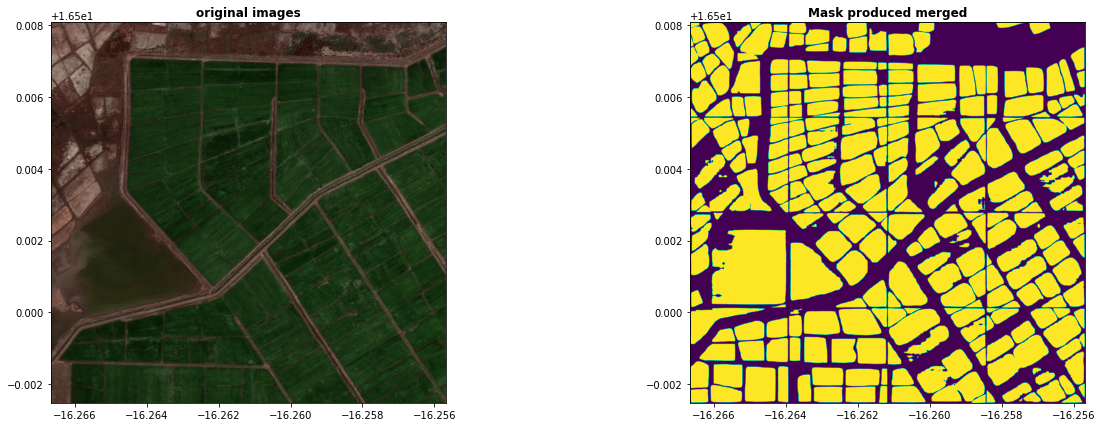

In [ ]:
!pip install rasterio
import rasterio
from matplotlib import pyplot
from rasterio.plot import show
from matplotlib import pyplot
src = rasterio.open("/content/drive/MyDrive/delineation_restults/new_automation/image/input/tile_4096-4096.tif")
src1 = rasterio.open("/content/drive/MyDrive/delineation_restults/new_automation/image/merge/merge.tif")
#pyplot.imshow(src.read(1), cmap='pink')
#matplotlib.image.AxesImage object at 0x...>
 #pyplot.show()
fig, (axr, axg) = pyplot.subplots(1,2, figsize=(21,7))
show(src, ax=axr, title='original images')
show(src1, ax=axg, title='Mask produced merged')

## Step 7 - Converting the binary mask into polygon

In [ ]:
merge_path='/content/drive/MyDrive/delineation_restults/new_automation/image/merge/merge.tif'
Raster_path='/content/drive/MyDrive/delineation_restults/new_automation/image/input/'+ 'tile_4096-4096.tif'
output_shp='/content/drive/MyDrive/delineation_restults/new_automation/image/vector/'+ 'merge.geojson'
Binary_mask_to_poly_geojson(merge_path,output_shp,channel_scaling=None, reference_im=Raster_path ,cr=None, output_type='geojson', min_area=0.000000032,bg_threshold=0, simplify=True,tolerance=0.00005)

,geometry,value
0,"POLYGON ((-16.25804 16.50807, -16.25735 16.508...",255.0
1,"POLYGON ((-16.26498 16.50806, -16.26470 16.508...",255.0
2,"POLYGON ((-16.26023 16.50806, -16.25988 16.508...",255.0
3,"POLYGON ((-16.26432 16.50801, -16.26397 16.508...",255.0
4,"POLYGON ((-16.26374 16.50806, -16.26346 16.508...",255.0
...,...,...
253,"POLYGON ((-16.25713 16.49778, -16.25692 16.497...",255.0
254,"POLYGON ((-16.26605 16.49798, -16.26524 16.497...",255.0
255,"POLYGON ((-16.26133 16.49796, -16.26118 16.497...",255.0
256,"POLYGON ((-16.25846 16.49773, -16.25845 16.497...",255.0


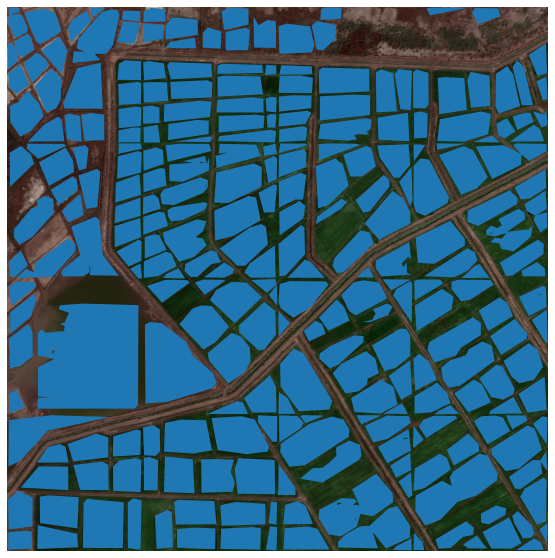

In [ ]:
#!pip install geopandas
import geopandas
import matplotlib.pyplot as plt
import fiona
import rasterio
import rasterio.plot
src = rasterio.open("/content/drive/MyDrive/delineation_restults/new_automation/image/input/tile_4096-4096.tif")
ref=geopandas.read_file('/content/drive/MyDrive/delineation_restults/new_automation/image/vector/'+ 'merge.geojson')
fig, ax = plt.subplots(figsize=(10, 10))
plt.axis("off")
rasterio.plot.show(src, ax=ax)
#myshp.plot(ax=ax, facecolor='none', edgecolor='red')
ref.plot( categorical=False, legend=False,linewidth=3, ax=ax)
#sec.plot(column='désert_par_km', categorical=True, legend=True,linewidth=3, ax=ax)
#house.plot(ax=ax, facecolor='blue', legend=True,markersize=45)
#house.plot(column='désert_par_km', categorical=True, legend=True,linewidth=1, ax=ax)
#p.plot(ax=ax, facecolor='none',edgecolor='yellow')
#house.plot( categorical=True, legend=True,linewidth=1, ax=ax)
#plt.savefig("/content/drive/MyDrive/visualisation/test/save.jpg")

## Step 8 - Cleaning the Inerior of each polygon 

In [ ]:
output_shp='/content/drive/MyDrive/delineation_restults/new_automation/image/vector/'+ 'merge.geojson'
result_shp='/content/drive/MyDrive/delineation_restults/new_automation/image/result/'+ 'result.geojson'
#interior_clean(output_shp,result_shp,10,min_area=0.000001)
interior_clean(output_shp,result_shp, 0.000001,min_area=0.0)

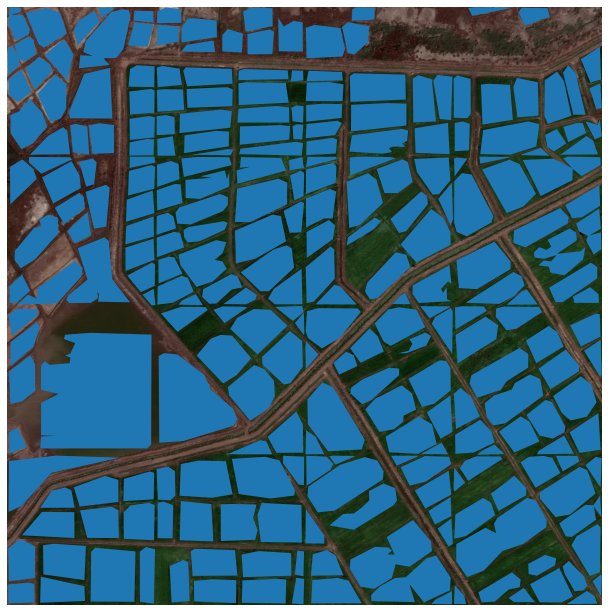

In [ ]:
import geopandas
import matplotlib.pyplot as plt
import fiona
import rasterio
import rasterio.plot
src = rasterio.open("/content/drive/MyDrive/delineation_restults/new_automation/image/input/tile_4096-4096.tif")
ref=geopandas.read_file('/content/drive/MyDrive/delineation_restults/new_automation/image/result/'+ 'result.geojson')
fig, ax = plt.subplots(figsize=(11, 11))
plt.axis("off")
rasterio.plot.show(src, ax=ax)
#myshp.plot(ax=ax, facecolor='none', edgecolor='red')
ref.plot( categorical=False, legend=False,linewidth=3, ax=ax)

## Step 9 - Visualisation of results


## Step 9 - getting maw number of hectas used


In [ ]:
a=0
data=geopandas.read_file('/content/drive/MyDrive/delineation_restults/new_automation/image/result/'+ 'result.geojson')
data1=data.to_crs('+proj=aeqd +units=m  +x_0=0 +y_0=0')
for x in data1['geometry']:
    y=x.area
    a=a+y
print(a)


835667.6824193117


In [ ]:
a=0
data=geopandas.read_file('/content/drive/MyDrive/delineation_restults/new_automation/image/result/'+ 'result.geojson')
data1=data.to_crs(3857)
for x in data1['geometry']:
    y=x.area
    a=a+y
v= a/10000 
z=round(v,2)
print('plot land use', z ,'hectares')



plot land use 88.98 hectares


In [ ]:
def fix_alignement(shape, out_path):
    data=geopandas.read_file(shape)
    e=[]
    for c in shape['geometry']:
        k=c.buffer(0.0000001)
        d.apppend(k)
    df3 = pd.DataFrame([ a for a in d],columns=['geometry'])
    gdf = geopandas.GeoDataFrame(df3)
    gdf.to_file(filename=out_path, driver='GeoJSON')
